In [1]:
# Set up
import pandas as pd
import seaborn as sbn
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('supermarket_sales - Sheet1 3.csv')
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


We won't spend time to clean data (removing missing values) because the description above stands as a proof that all columns are full. Let see some basic stats about the supermarket.

In [4]:
# How many branches do we have
branches = data['Branch'].unique().tolist()
print('There are {} branches as followed\n{}'.format(len(branches), branches))

There are 3 branches as followed
['A', 'C', 'B']


In [5]:
# Location
locations = data['City'].unique().tolist()
print('There are {} cities covered\n{}'.format(len(locations), locations))

There are 3 cities covered
['Yangon', 'Naypyitaw', 'Mandalay']


In [6]:
# Product line
products = data['Product line'].unique().tolist()
print('There are {} categories of products\n{}'.format(len(products), products))

There are 6 categories of products
['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']


In [7]:
# Payment
payment = data['Payment'].unique().tolist()
print('There are {} ways of payment\n{}'.format(len(payment), payment))

There are 3 ways of payment
['Ewallet', 'Cash', 'Credit card']


With the data we have, it's not shameful to say that the supremarket line has 3 branches in 3 cities that provides 6 categories of products which can be purchased in 3 ways. Now, let see the share of each branches in the global environment of the company.

In [8]:
# Is there one branch per city ?
for city in data['City'].unique().tolist():
    temp_data = data[data['City'] == city]
    branch_per_city = temp_data['Branch'].unique().tolist()
    print('{} has {} branch(es): {}'.format(city, len(branch_per_city), branch_per_city))

Yangon has 1 branch(es): ['A']
Naypyitaw has 1 branch(es): ['C']
Mandalay has 1 branch(es): ['B']


# Which city is more profitable ?

Branch
B    106197.6720
A    106200.3705
C    110568.7065
Name: Total, dtype: float64


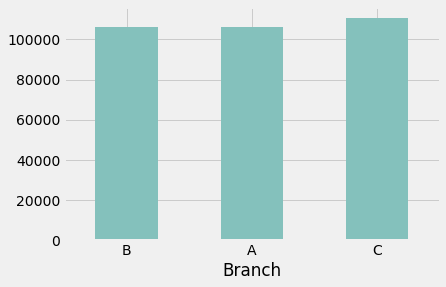

In [9]:
# Most income
income_per_branch = data.groupby('Branch')['Total'].sum()
income_per_branch = income_per_branch.sort_values()
print(income_per_branch)
income_per_branch.plot.bar(x='Branch', rot=0, color= '#84C1BC');

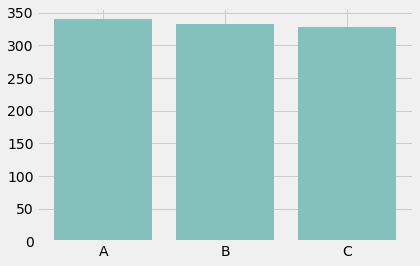

In [10]:
# Most invoices
invoice_per_branch = data.groupby(['Branch']).size().reset_index(name='Counts')
plt.bar('Branch', 'Counts', data= invoice_per_branch, color= '#84C1BC');

All 3 branches have a quite similar income around 110k
Branch C seems to have less invoices but make higher income than the two others.

# What can distinguished C from the others ?

What can distinguished C from the others ?

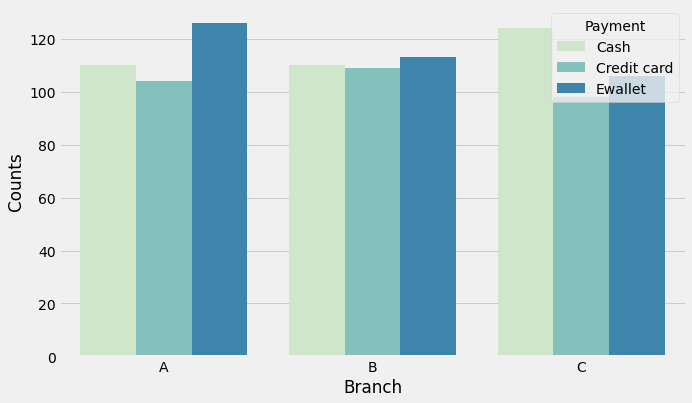

In [11]:
# Payment ways
paym_branch = data.groupby(['Branch', 'Payment']).size().reset_index(name='Counts')

plt.figure(figsize=(10, 6))
sbn.barplot(x="Branch", y="Counts", hue="Payment", data=paym_branch, ci=None, palette="GnBu");

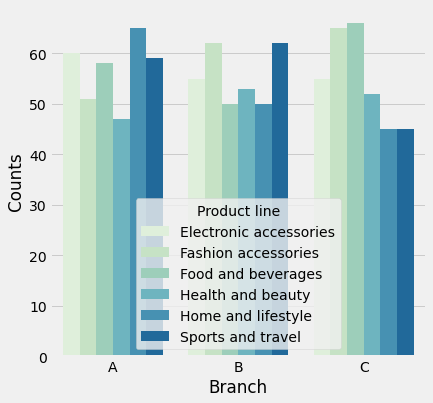

In [12]:
# Categories per branch
cat_branch = data.groupby(['Branch', 'Product line']).size().reset_index(name='Counts')

plt.figure(figsize=(6, 6))
sbn.barplot(x="Branch", y="Counts", hue="Product line", data=cat_branch, ci=None, palette="GnBu");

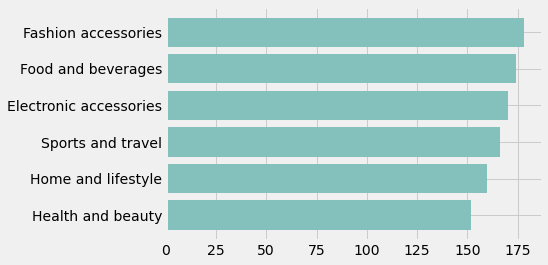

In [13]:
# Most demand category
category_pur = data.groupby(['Product line']).size().reset_index(name='Counts')
plt.barh('Product line', 'Counts', data= category_pur.sort_values(by='Counts'), color= '#84C1BC');

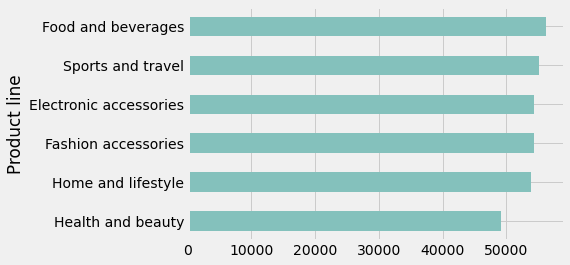

In [14]:
# Income per category
sell_cat = data.groupby('Product line')['Total'].sum()
sell_cat = sell_cat.sort_values()
sell_cat.plot.barh(x='Product line', rot=0, color= '#84C1BC');

Branch
B    6.818072
A    7.027059
C    7.072866
Name: Rating, dtype: float64


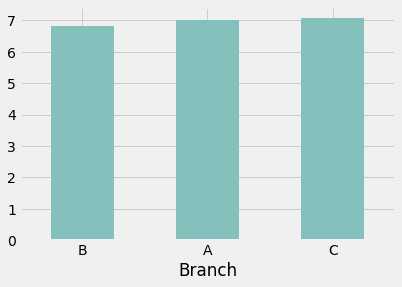

In [15]:
# Rating
rating_per_branch = data.groupby('Branch')['Rating'].mean()
rating_per_branch = rating_per_branch.sort_values()
print(rating_per_branch)
rating_per_branch.plot.bar(x='Branch', rot=0, color= '#84C1BC');

C tends to be oriented toward popular features:

The best rated branch
It's where people prefer to use cash
The pursued items are mostly categorised in Food and beverages which is the 2nd demanded category and 1st most profitable
Leader also in the first demanded category Fashion accessories